**CUADERNO Nº 1: LECTURA, VISUALIZACIÓN Y ANÁLISIS DE UN DATASET 2D BIVARIABLE HOMOTOPICO (EN EDICIÓN)**

*El presente cuaderno de jupyter esta adaptado para leer archivos en formato .csv con columnas (X,Y) y variables de interés (VA, VB).* La condición homotopica refiere a que la cantidad de muestras VA = VB.

*El cuaderno genera un modelo univariado & bivariado de categorización.*

POR HEBER HERNÁNDEZ GUERRA

In [5]:
import geostatspy.GSLIB as GSLIB                          # Utilidades GSLIB y funciones envueltas
import geostatspy.geostats as geostats                    # GSLIB convertido a Python
import os                                                 # Para configurar el directorio de trabajo
import numpy as np                                        # Biblioteca de funciones matemáticas
import pandas as pd                                       # Biblioteca para manipulación de marcos de datos
import matplotlib.pyplot as plt                           # Biblioteca para salida gráfica
import scipy.stats                                        # Biblioteca de resumenes estadísticos y matemáticos
import random as rand
% matplotlib inline

In [6]:
os.chdir("C:/Users/Heber/Desktop/Tesis2019/Tesis_Python/GSLIB_FOLDER") # ruta de ejecutables de GSLIB 

**I. Para analizar sus datos, escriba la ruta del archivo**, en pd.read_csv("carpeta/archivo")

En este ejemplo el archivo se encuentra en una carpeta de nombre "Tesis_Python", la cual se aloja en el disco "C". 

In [7]:
df = pd.read_csv("C:/Users/Heber/Desktop/Tesis2019/Tesis_Python/heber_3.csv", sep=";")
print("Nota: Si su archivo no se ve bien (fila/columna), puede variar el separador a coma, punto, espacio.")
df.head()

Nota: Si su archivo no se ve bien (fila/columna), puede variar el separador a coma, punto, espacio.


,Este [X],Norte [Y],VA,VB
0,50,450,11.55,8.90
1,50,400,10.99,7.14
2,50,350,9.78,6.00
3,50,300,9.62,5.29
4,50,250,7.92,4.20


 make_variogram Warning: sill does not sum to 1.0, do not use in simulation 
  Estimated   10000 blocks 
      average   8.868357238625876  variance  5.986860877963224
 make_variogram Warning: sill does not sum to 1.0, do not use in simulation 
  Estimated   10000 blocks 
      average   5.736647711222028  variance  3.509838767888425


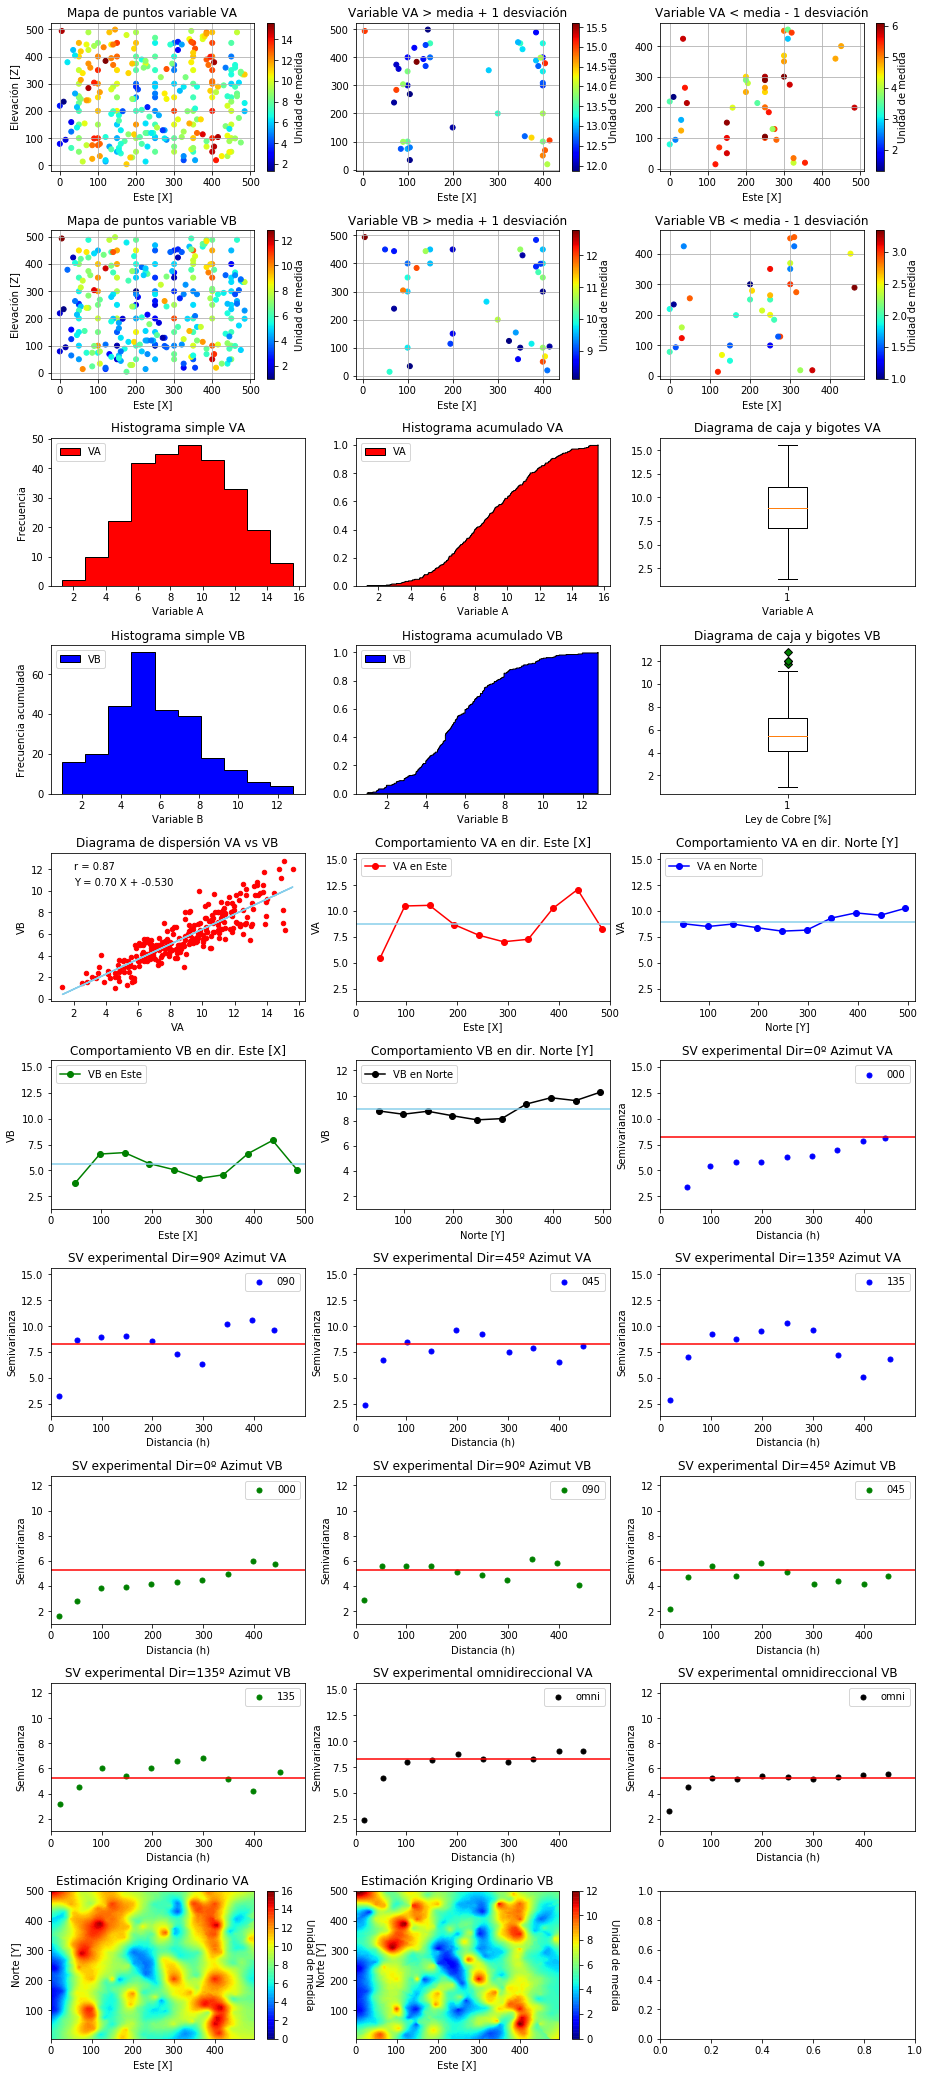

In [38]:
xmin = df["Este [X]"].min() #coordenada x mínimo
xmax = df["Este [X]"].max() #coordenada x máximo
ymin = df["Norte [Y]"].min() #coordenada y mínimo
ymax = df["Norte [Y]"].max() #coordenada y máximo
cmap= plt.cm.jet #colores estilo jet
vamin = df["VA"].min() #valor de la variable A mínimo
vamax = df["VA"].max() #valor de la variable A máximo
vbmin = df["VB"].min() #valor de la variable B mínimo
vbmax = df["VB"].max() #valor de la variable B máximo
#GSLIB.locmap(df,'Este [X]','Norte [Y]','VA',xmin,xmax,ymin,ymax,vamin,vamax,'Mapa de puntos variable VA','Este [X]','Norte [Y]','Unidad de medida',cmap,"fig_title")
#GSLIB.locmap(df,'Este [X]','Norte [Y]','VB',xmin,xmax,ymin,ymax,vamin,vamax,'Mapa de puntos variable VB','Este (X)','Norte [Y]','Unidad de medida',cmap, "fig_title2")
#plt.show()
plt.subplot(10,3,1) 
marker_size = 25
plt.scatter(df["Este [X]"], df["Norte [Y]"], marker_size, df["VA"], cmap= plt.cm.jet)
plt.xlabel("Este [X]")
plt.ylabel("Elevación [Z]")
plt.title("Mapa de puntos variable VA")
plt.grid()
cbar = plt.colorbar()
cbar.set_label("Unidad de medida", labelpad=+1)
plt.subplot(10,3,2) 
altas_va = df["VA"].mean() + np.sqrt(df["VA"].var()) #media + 1 desviación estandar
df_va = df[df["VA"]>altas_va] #dataframe con valores de VA altas
plt.scatter(df_va["Este [X]"], df_va["Norte [Y]"], marker_size, df_va["VA"], cmap= cmap)
plt.xlabel("Este [X]")
#plt.ylabel("Elevación [Z]")
plt.title("Variable VA > media + 1 desviación")
plt.grid()
cbar = plt.colorbar()
cbar.set_label("Unidad de medida", labelpad=+1)
plt.subplot(10,3,3) 
bajas_va2 = df["VA"].mean() - 1*(np.sqrt(df["VA"].var())) #media - 1 desviación estandar
df_va2 = df[df["VA"]<bajas_va2] #dataframe con valores de VA bajas de media -1 desviación
plt.scatter(df_va2["Este [X]"], df_va2["Norte [Y]"], marker_size, df_va2["VA"], cmap= cmap)
plt.xlabel("Este [X]")
#plt.ylabel("Elevación [Z]")
plt.title("Variable VA < media - 1 desviación")
plt.grid()
cbar = plt.colorbar()
cbar.set_label("Unidad de medida", labelpad=+1)
plt.subplot(10,3,4) 
plt.scatter(df["Este [X]"], df["Norte [Y]"], marker_size, df["VB"], cmap= cmap)
plt.xlabel("Este [X]")
plt.ylabel("Elevación [Z]")
plt.title("Mapa de puntos variable VB")
plt.grid()
cbar = plt.colorbar()
cbar.set_label("Unidad de medida", labelpad=+1)
plt.subplot(10,3,5)
altas_vb = df["VB"].mean() + np.sqrt(df["VB"].var()) #media + 1 desviación estandar
df_vb = df[df["VB"]>altas_vb] #dataframe con valores de VA altas
plt.scatter(df_vb["Este [X]"], df_vb["Norte [Y]"], marker_size, df_vb["VB"], cmap= cmap)
plt.xlabel("Este [X]")
#plt.ylabel("Elevación [Z]")
plt.title("Variable VB > media + 1 desviación")
plt.grid()
cbar = plt.colorbar()
cbar.set_label("Unidad de medida", labelpad=+1)
plt.subplot(10,3,6)
bajas_vb2 = df["VB"].mean() - 1*(np.sqrt(df["VB"].var())) #media - 1 desviación estandar
df_vb2 = df[df["VB"]<bajas_vb2] #dataframe con valores de VA bajas de la media - 1 desviación
plt.scatter(df_vb2["Este [X]"], df_vb2["Norte [Y]"], marker_size, df_vb2["VB"], cmap= cmap)
plt.xlabel("Este [X]")
#plt.ylabel("Elevación [Z]")
plt.title("Variable VB < media - 1 desviación")
plt.grid()
cbar = plt.colorbar()
cbar.set_label("Unidad de medida", labelpad=+1)
plt.subplot(10,3,7)
plt.hist(df['VA'], bins="sturges",color='red',edgecolor='black', histtype='stepfilled',cumulative=False, label='VA')
plt.xlabel("Variable A")
plt.ylabel("Frecuencia")
plt.legend(loc='upper left')
plt.title("Histograma simple VA")
plt.subplot(10,3,8)
plt.hist(df['VA'], bins=1000,color='red',edgecolor='black', density=True, histtype='stepfilled',cumulative=True, label='VA')
plt.xlabel("Variable A")
#plt.ylabel("Frecuencia")
plt.legend(loc='upper left')
plt.title("Histograma acumulado VA")
plt.subplot(10,3,9)
diamantes = dict(markerfacecolor='g', marker='D')
plt.boxplot(df['VA'], vert=True, flierprops=diamantes, showfliers=True)
plt.xlabel("Variable A")
plt.title("Diagrama de caja y bigotes VA")
plt.subplot(10,3,10) 
plt.hist(df['VB'], bins="sturges",color='blue', density=False, edgecolor='black', histtype='stepfilled',cumulative=False, label='VB')
plt.xlabel("Variable B")
plt.ylabel("Frecuencia acumulada")
plt.legend(loc='upper left')
plt.title("Histograma simple VB")
plt.subplot(10,3,11) 
plt.hist(df['VB'], bins=1000,color='blue',edgecolor='black', density=True, histtype='stepfilled',cumulative=True, label='VB')
plt.xlabel("Variable B")
#plt.ylabel("Frecuencia")
plt.legend(loc='upper left')
plt.title("Histograma acumulado VB")
plt.subplot(10,3,12) 
diamantes2 = dict(markerfacecolor='g', marker='D')
plt.boxplot(df['VB'], vert=True, flierprops=diamantes, showfliers=True)
plt.xlabel("Ley de Cobre [%]")
plt.title("Diagrama de caja y bigotes VB")
plt.subplot(10,3,13) 
x = df["VA"] #todos los valores de la variable VA
y = df["VB"] #todos los valores de la variable VB
#Calculando los coeficientes del ajuste de regresión:
a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio
r = np.corrcoef(x, y) # r = coeficiente de correlación
#print("R:", r, "a:", a, "b:", b) # b: pendiente de la recta, a: ordenada en la vertical (Y = bX + a)
plt.scatter(x,y, color="r", s=20)
plt.title("Diagrama de dispersión VA vs VB")
plt.xlabel("VA")
plt.ylabel("VB")
plt.plot(x, a * x + b, color="skyblue")
plt.text(2,12, 'r = {0:2.2f}'.format(r[0,1]))
plt.text(2,10.5, 'Y = {0:2.2f} X + {1:2.3f}'.format(a,b))
plt.subplot(10,3,14) 
ymin_x = (df["Este [X]"].min()*0.8)
ymax_x = (df["Este [X]"].max()*1.03)
ymin_y = (df["Norte [Y]"].min()*0.8)
ymax_y = (df["Norte [Y]"].max()*1.03)
ymin_x = (df["Este [X]"].min()*0.8)
ymax_x = (df["Este [X]"].max()*1.03)
ymin_y = (df["Norte [Y]"].min()*0.8)
ymax_y = (df["Norte [Y]"].max()*1.03)
ventana1_este = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.1 #Este al 10%
ventana2_este = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.2 #Este al 20%
ventana3_este = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.3 #Este al 30%
ventana4_este = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.4 #Este al 40%
ventana5_este = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.5 #Este al 50%
ventana6_este = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.6 #Este al 60%
ventana7_este = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.7 #Este al 70%
ventana8_este = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.8 #Este al 80%
ventana9_este = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.9 #Este al 90%
ventana10_este = (df["Este [X]"].max() - df["Este [X]"].min()) * 1 #Este al 100%
a = (df[(df['Este [X]']>= 0) & (df['Este [X]']<ventana1_este)]).mean()
ax = a["VA"] # Valor media de VA en la ventana Nº 1
b = (df[(df['Este [X]']>= ventana1_este) & (df['Este [X]']<ventana2_este)]).mean()
bx= b["VA"] # Valor media de VA en la ventana Nº 2
c = (df[(df['Este [X]']>= ventana2_este) & (df['Este [X]']<ventana3_este)]).mean()
cx = c["VA"] # Valor media de VA en la ventana Nº 3
d = (df[(df['Este [X]']>= ventana3_este) & (df['Este [X]']<ventana4_este)]).mean()
dx = d["VA"] # Valor media de VA en la ventana Nº 4
e = (df[(df['Este [X]']>= ventana4_este) & (df['Este [X]']<ventana5_este)]).mean()
ex = e["VA"]# Valor media de VA en la ventana Nº 5
f = (df[(df['Este [X]']>= ventana5_este) & (df['Este [X]']<ventana6_este)]).mean()
fx = f["VA"]# Valor media de VA en la ventana Nº 6
g = (df[(df['Este [X]']>= ventana6_este) & (df['Este [X]']<ventana7_este)]).mean()
gx = g["VA"]# Valor media de VA en la ventana Nº 7
h = (df[(df['Este [X]']>= ventana7_este) & (df['Este [X]']<ventana8_este)]).mean()
hx = h["VA"]# Valor media de VA en la ventana Nº 8
i = (df[(df['Este [X]']>= ventana8_este) & (df['Este [X]']<ventana9_este)]).mean()
ix = i["VA"]# Valor media de VA en la ventana Nº 9
j = (df[(df['Este [X]']>= ventana9_este) & (df['Este [X]']<ventana10_este)]).mean()
jx = j["VA"]# Valor media de VA en la ventana Nº 10
d_x = {"este_x": [ventana1_este,ventana2_este,ventana3_este,ventana4_este,ventana5_este,ventana6_este,ventana7_este,ventana8_este,ventana9_este,ventana10_este] , "VA_x": [ax,bx,cx,dx,ex,fx,gx,hx,ix,jx]}
df_new_x = pd.DataFrame(d_x)
este_media = df_new_x['VA_x'].mean()
plt.plot(df_new_x['este_x'], df_new_x['VA_x'], c="red", marker="o", label="VA en Este")
plt.legend(loc='upper left')
plt.plot([ymin_x,ymax_x],[este_media,este_media],color = 'skyblue') 
plt.xlabel("Este [X]")
plt.ylabel("VA")
plt.title("Comportamiento VA en dir. Este [X]")
plt.xlim(ymin_x,ymax_x)
plt.ylim(df["VA"].min(), df["VA"].max())
#plt.grid(True)
plt.subplot(10,3,15)
ventana1_norte = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.1 #Norte al 10%
ventana2_norte = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.2 #Norte al 20%
ventana3_norte = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.3 #Norte al 30%
ventana4_norte = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.4 #Norte al 40%
ventana5_norte = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.5 #Norte al 50%
ventana6_norte = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.6 #Norte al 60%
ventana7_norte = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.7 #Norte al 70%
ventana8_norte = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.8 #Norte al 80%
ventana9_norte = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.9 #Norte al 90%
ventana10_norte = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 1 #Norte al 100%
a2 = (df[(df['Norte [Y]']>= 0) & (df['Norte [Y]']<ventana1_norte)]).mean()
ay = a2["VA"] # Valor media de VA en la ventana Nº 1
b2 = (df[(df['Norte [Y]']>= ventana1_norte) & (df['Norte [Y]']<ventana2_norte)]).mean()
by= b2["VA"] # Valor media de VA en la ventana Nº 2
c2= (df[(df['Norte [Y]']>= ventana2_norte) & (df['Norte [Y]']<ventana3_norte)]).mean()
cy = c2["VA"] # Valor media de VA en la ventana Nº 3
d2 = (df[(df['Norte [Y]']>= ventana3_norte) & (df['Norte [Y]']<ventana4_norte)]).mean()
dy = d2["VA"] # Valor media de VA en la ventana Nº 4
e2 = (df[(df['Norte [Y]']>= ventana4_norte) & (df['Norte [Y]']<ventana5_norte)]).mean()
ey = e2["VA"]# Valor media de VA en la ventana Nº 5
f2 = (df[(df['Norte [Y]']>= ventana5_norte) & (df['Norte [Y]']<ventana6_norte)]).mean()
fy = f2["VA"]# Valor media de VA en la ventana Nº 6
g2 = (df[(df['Norte [Y]']>= ventana6_norte) & (df['Norte [Y]']<ventana7_norte)]).mean()
gy = g2["VA"]# Valor media de VA en la ventana Nº 7
h2 = (df[(df['Norte [Y]']>= ventana7_norte) & (df['Norte [Y]']<ventana8_norte)]).mean()
hy = h2["VA"]# Valor media de VA en la ventana Nº 8
i2 = (df[(df['Norte [Y]']>= ventana8_norte) & (df['Norte [Y]']<ventana9_norte)]).mean()
iy = i2["VA"]# Valor media de VA en la ventana Nº 9
j2 = (df[(df['Norte [Y]']>= ventana9_norte) & (df['Norte [Y]']<ventana10_norte)]).mean()
jy = j2["VA"]# Valor media de VA en la ventana Nº 10
d_y = {"norte_y": [ventana1_norte,ventana2_norte,ventana3_norte,ventana4_norte,ventana5_norte,ventana6_norte,ventana7_norte,ventana8_norte,ventana9_norte,ventana10_norte] , "VA_y": [ay,by,cy,dy,ey,fy,gy,hy,iy,jy]}
df_new_y = pd.DataFrame(d_y)
norte_media = df_new_y['VA_y'].mean()
plt.plot(df_new_y['norte_y'], df_new_y['VA_y'],c="blue", marker="o", label="VA en Norte")
plt.legend(loc='upper left')
plt.plot([ymin_y,ymax_y],[norte_media,norte_media],color = 'skyblue') 
plt.xlabel("Norte [Y]")
plt.ylabel("VA")
plt.title("Comportamiento VA en dir. Norte [Y]")
plt.xlim(ymin_y,ymax_y)
plt.ylim(df["VA"].min(), df["VA"].max())
#plt.grid(True)
plt.subplot(10,3,16)
ventana1_esteb = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.1 #Este al 10%
ventana2_esteb = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.2 #Este al 20%
ventana3_esteb = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.3 #Este al 30%
ventana4_esteb = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.4 #Este al 40%
ventana5_esteb = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.5 #Este al 50%
ventana6_esteb = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.6 #Este al 60%
ventana7_esteb = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.7 #Este al 70%
ventana8_esteb = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.8 #Este al 80%
ventana9_esteb = (df["Este [X]"].max() - df["Este [X]"].min()) * 0.9 #Este al 90%
ventana10_esteb = (df["Este [X]"].max() - df["Este [X]"].min()) * 1 #Este al 100%
ab = (df[(df['Este [X]']>= 0) & (df['Este [X]']<ventana1_esteb)]).mean()
axb = ab["VB"] # Valor media de VA en la ventana Nº 1
bb = (df[(df['Este [X]']>= ventana1_esteb) & (df['Este [X]']<ventana2_esteb)]).mean()
bxb= bb["VB"] # Valor media de VA en la ventana Nº 2
cb = (df[(df['Este [X]']>= ventana2_esteb) & (df['Este [X]']<ventana3_esteb)]).mean()
cxb = cb["VB"] # Valor media de VA en la ventana Nº 3
db = (df[(df['Este [X]']>= ventana3_esteb) & (df['Este [X]']<ventana4_esteb)]).mean()
dxb = db["VB"] # Valor media de VA en la ventana Nº 4
eb = (df[(df['Este [X]']>= ventana4_esteb) & (df['Este [X]']<ventana5_esteb)]).mean()
exb = eb["VB"]# Valor media de VA en la ventana Nº 5
fb = (df[(df['Este [X]']>= ventana5_esteb) & (df['Este [X]']<ventana6_esteb)]).mean()
fxb = fb["VB"]# Valor media de VA en la ventana Nº 6
gb = (df[(df['Este [X]']>= ventana6_esteb) & (df['Este [X]']<ventana7_esteb)]).mean()
gxb = gb["VB"]# Valor media de VA en la ventana Nº 7
hb = (df[(df['Este [X]']>= ventana7_esteb) & (df['Este [X]']<ventana8_esteb)]).mean()
hxb = hb["VB"]# Valor media de VA en la ventana Nº 8
ib = (df[(df['Este [X]']>= ventana8_esteb) & (df['Este [X]']<ventana9_esteb)]).mean()
ixb = ib["VB"]# Valor media de VA en la ventana Nº 9
jb = (df[(df['Este [X]']>= ventana9_esteb) & (df['Este [X]']<ventana10_esteb)]).mean()
jxb = jb["VB"]# Valor media de VA en la ventana Nº 10
d_xb = {"este_x": [ventana1_esteb,ventana2_esteb,ventana3_esteb,ventana4_esteb,ventana5_esteb,ventana6_esteb,ventana7_esteb,ventana8_esteb,ventana9_esteb,ventana10_esteb] , "VA_x": [axb,bxb,cxb,dxb,exb,fxb,gxb,hxb,ixb,jxb]}
df_new_xb = pd.DataFrame(d_xb)
este_mediab = df_new_xb['VA_x'].mean()
plt.plot(df_new_xb['este_x'], df_new_xb['VA_x'], c="g", marker="o", label="VB en Este")
plt.legend(loc='upper left')
plt.plot([ymin_x,ymax_x],[este_mediab,este_mediab],color = 'skyblue') 
plt.xlabel("Este [X]")
plt.ylabel("VB")
plt.title("Comportamiento VB en dir. Este [X]")
plt.xlim(ymin_x,ymax_x)
plt.ylim(df["VA"].min(), df["VA"].max())
#plt.grid(True)
plt.subplot(10,3,17)
ventana1_norteb = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.1 #Norte al 10%
ventana2_norteb = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.2 #Norte al 20%
ventana3_norteb = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.3 #Norte al 30%
ventana4_norteb = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.4 #Norte al 40%
ventana5_norteb = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.5 #Norte al 50%
ventana6_norteb = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.6 #Norte al 60%
ventana7_norteb = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.7 #Norte al 70%
ventana8_norteb = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.8 #Norte al 80%
ventana9_norteb = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 0.9 #Norte al 90%
ventana10_norteb = (df["Norte [Y]"].max() - df["Norte [Y]"].min()) * 1 #Norte al 100%
a2b = (df[(df['Norte [Y]']>= 0) & (df['Norte [Y]']<ventana1_norteb)]).mean()
ayb = a2b["VA"] # Valor media de VA en la ventana Nº 1
b2b = (df[(df['Norte [Y]']>= ventana1_norteb) & (df['Norte [Y]']<ventana2_norteb)]).mean()
byb= b2b["VA"] # Valor media de VA en la ventana Nº 2
c2b= (df[(df['Norte [Y]']>= ventana2_norteb) & (df['Norte [Y]']<ventana3_norteb)]).mean()
cyb = c2b["VA"] # Valor media de VA en la ventana Nº 3
d2b = (df[(df['Norte [Y]']>= ventana3_norteb) & (df['Norte [Y]']<ventana4_norteb)]).mean()
dyb = d2b["VA"] # Valor media de VA en la ventana Nº 4
e2b = (df[(df['Norte [Y]']>= ventana4_norteb) & (df['Norte [Y]']<ventana5_norteb)]).mean()
eyb = e2b["VA"]# Valor media de VA en la ventana Nº 5
f2b = (df[(df['Norte [Y]']>= ventana5_norteb) & (df['Norte [Y]']<ventana6_norteb)]).mean()
fyb = f2b["VA"]# Valor media de VA en la ventana Nº 6
g2b = (df[(df['Norte [Y]']>= ventana6_norteb) & (df['Norte [Y]']<ventana7_norteb)]).mean()
gyb = g2b["VA"]# Valor media de VA en la ventana Nº 7
h2b = (df[(df['Norte [Y]']>= ventana7_norteb) & (df['Norte [Y]']<ventana8_norteb)]).mean()
hyb = h2b["VA"]# Valor media de VA en la ventana Nº 8
i2b = (df[(df['Norte [Y]']>= ventana8_norteb) & (df['Norte [Y]']<ventana9_norteb)]).mean()
iyb = i2b["VA"]# Valor media de VA en la ventana Nº 9
j2b = (df[(df['Norte [Y]']>= ventana9_norteb) & (df['Norte [Y]']<ventana10_norteb)]).mean()
jyb = j2b["VA"]# Valor media de VA en la ventana Nº 10
d_yb = {"norte_y": [ventana1_norteb,ventana2_norteb,ventana3_norteb,ventana4_norteb,ventana5_norteb,ventana6_norteb,ventana7_norteb,ventana8_norteb,ventana9_norteb,ventana10_norteb] , "VB_y": [ayb,byb,cyb,dyb,eyb,fyb,gyb,hyb,iyb,jyb]}
df_new_yb = pd.DataFrame(d_yb)
norte_mediab = df_new_yb['VB_y'].mean()
plt.plot(df_new_yb['norte_y'], df_new_yb['VB_y'],c="black", marker="o", label="VB en Norte")
plt.legend(loc='upper left')
plt.plot([ymin_y,ymax_y],[norte_mediab,norte_mediab],color = 'skyblue') 
plt.xlabel("Norte [Y]")
plt.ylabel("VB")
plt.title("Comportamiento VB en dir. Norte [Y]")
plt.xlim(ymin_y,ymax_y)
plt.ylim(df["VB"].min(), df["VB"].max())
#plt.grid(True)
plt.subplot(10,3,18)
xlag1 = df["Este [X]"].max() # h máximo eje X (h1)
xlag2 = df["Norte [Y]"].max() # h máximo eje Y (h2)
xlag11 = df["Este [X]"].min() # h mínimo eje X (h3)
xlag12 = df["Norte [Y]"].min() # h mínimo eje Y (h4)
dxlag = {"xlag": [xlag1, xlag2], "xlag_min": [xlag11, xlag12]} 
df_xlag = pd.DataFrame(dxlag) # df con h1 y h2, h3 y h4
hmax = df_xlag["xlag"].max() # h máxima del vector
hmin = df_xlag["xlag_min"].min() # h mínima del vector
nlag= 10 # Nº de pasos
xlag = round(hmax/nlag) # h máxima dividida en nlag (nlag = Nº de lag)
xltol = round(xlag/2,0) # tolerancia en el paso 
atol = 22.5 #valor teorico 
bandwh = round(xlag*0.80,0) # 80% del lag
ylim_minva = df["VA"].min()
ylim_maxva = df["VA"].max()
var_va = df["VA"].var()
tmin= -999; tmax=999; xlag=xlag; xltol =xltol; nlag=nlag; atol=27; bandwh=bandwh; isill = 0
lag000, vario000, np000 = geostats.gamv(df, "Este [X]", "Norte [Y]", "VA", tmin, tmax, xlag, xltol, nlag, 0, atol, bandwh, isill)
lag090, vario090, np090 = geostats.gamv(df, "Este [X]", "Norte [Y]", "VA", tmin, tmax, xlag, xltol, nlag, 90, atol, bandwh, isill)
lag045, vario045, np045 = geostats.gamv(df, "Este [X]", "Norte [Y]", "VA", tmin, tmax, xlag, xltol, nlag, 45, atol, bandwh, isill)
lag135, vario135, np135 = geostats.gamv(df, "Este [X]", "Norte [Y]", "VA", tmin, tmax, xlag, xltol, nlag, 135, atol, bandwh, isill)
plt.scatter(lag000, vario000, s=25, marker="o", color="blue", label="000")
plt.plot([hmin,hmax], [var_va,var_va], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("SV experimental Dir=0º Azimut VA")
plt.ylim(ylim_minva,ylim_maxva)
plt.xlim(hmin,hmax)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(10,3,19)
plt.scatter(lag090, vario090, s=25, marker="o", color="blue", label="090")
plt.plot([hmin,hmax], [var_va,var_va], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("SV experimental Dir=90º Azimut VA")
plt.ylim(ylim_minva,ylim_maxva)
plt.xlim(hmin,hmax)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(10,3,20)
plt.scatter(lag045, vario045, s=25, marker="o", color="blue", label="045")
plt.plot([hmin,hmax], [var_va,var_va], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("SV experimental Dir=45º Azimut VA")
plt.ylim(ylim_minva,ylim_maxva)
plt.xlim(hmin,hmax)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(10,3,21)
plt.scatter(lag135, vario135, s=25, marker="o", color="blue", label="135")
plt.plot([hmin,hmax], [var_va,var_va], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("SV experimental Dir=135º Azimut VA")
plt.ylim(ylim_minva,ylim_maxva)
plt.xlim(hmin,hmax)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(10,3,22)
ymin_varb = df["VB"].min()
ymax_varb = df["VB"].max()
var_vb = df["VB"].var()
tmin= -999; tmax=999; xlag=xlag; xltol =xltol; nlag=nlag; atol=27; bandwh=bandwh; isill = 0
lag000b, vario000b, np000b = geostats.gamv(df, "Este [X]", "Norte [Y]", "VB", tmin, tmax, xlag, xltol, nlag, 0, atol, bandwh, isill)
lag090b, vario090b, np090b = geostats.gamv(df, "Este [X]", "Norte [Y]", "VB", tmin, tmax, xlag, xltol, nlag, 90, atol, bandwh, isill)
lag045b, vario045b, np045b = geostats.gamv(df, "Este [X]", "Norte [Y]", "VB", tmin, tmax, xlag, xltol, nlag, 45, atol, bandwh, isill)
lag135b, vario135b, np135b = geostats.gamv(df, "Este [X]", "Norte [Y]", "VB", tmin, tmax, xlag, xltol, nlag, 135, atol, bandwh, isill)
plt.scatter(lag000b, vario000b, s=25, marker="o", color="g", label="000")
plt.plot([hmin,hmax], [var_vb,var_vb], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("SV experimental Dir=0º Azimut VB")
plt.ylim(ymin_varb,ymax_varb)
plt.xlim(hmin,hmax)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(10,3,23)
plt.scatter(lag090b, vario090b, s=25, marker="o", color="g", label="090")
plt.plot([hmin,hmax], [var_vb,var_vb], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("SV experimental Dir=90º Azimut VB")
plt.ylim(ymin_varb,ymax_varb)
plt.xlim(hmin,hmax)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(10,3,24)
plt.scatter(lag045b, vario045b, s=25, marker="o", color="g", label="045")
plt.plot([hmin,hmax], [var_vb,var_vb], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("SV experimental Dir=45º Azimut VB")
plt.ylim(ymin_varb,ymax_varb)
plt.xlim(hmin,hmax)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(10,3,25)
plt.scatter(lag135b, vario135b, s=25, marker="o", color="G", label="135")
plt.plot([hmin,hmax], [var_vb,var_vb], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("SV experimental Dir=135º Azimut VB")
plt.ylim(ymin_varb,ymax_varb)
plt.xlim(hmin,hmax)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(10,3,26)
lagiso, varioiso, npiso = geostats.gamv(df, "Este [X]", "Norte [Y]", "VA", tmin, tmax, xlag, xltol, nlag, 0, 90, 9999, isill)
plt.scatter(lagiso, varioiso, s=25, marker="o", color="black", label="omni")
plt.plot([hmin,hmax], [var_va,var_va], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("SV experimental omnidireccional VA")
plt.ylim(ylim_minva,ylim_maxva)
plt.xlim(hmin,hmax)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(10,3,27)
lagisob, varioisob, npisob = geostats.gamv(df, "Este [X]", "Norte [Y]", "VB", tmin, tmax, xlag, xltol, nlag, 0, 90, 9999, isill)
plt.scatter(lagisob, varioisob, s=25, marker="o", color="black", label="omni")
plt.plot([hmin,hmax], [var_vb,var_vb], color="red")
plt.xlabel("Distancia (h)")
plt.ylabel("Semivarianza")
plt.title("SV experimental omnidireccional VB")
plt.ylim(ymin_varb,ymax_varb)
plt.xlim(hmin,hmax)
#plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])
plt.subplot(10,3,28)
vario_kri = GSLIB.make_variogram(0,1,1,5,0,200,200)
tmin = 0; tmax =100; xmn = 0; ymn = 0; ysiz = 5; xsiz=5; nx=100; ny=100
nxdis=1; nydis=1; ndmin=3; ndmax=12; radius=200; ktype=1; skmean=1
kmap2, vmap2 = geostats.kb2d(df, 'Este [X]','Norte [Y]','VA', tmin, tmax, nx, xmn, xsiz, ny, ymn, ysiz, nxdis, nydis, 
                             ndmin, ndmax, radius, ktype, skmean, vario_kri)
xmax=500;ymax=500
GSLIB.pixelplt_st(kmap2,xmin,xmax,ymin,ymax,xsiz,0,16,"Estimación Kriging Ordinario VA","Este [X]","Norte [Y]","Unidad de medida",cmap)
plt.subplot(10,3,29)
vario_kri_2 = GSLIB.make_variogram(0,1,1,5,0,100,100)
kmap, vmap = geostats.kb2d(df, 'Este [X]','Norte [Y]','VB', tmin, tmax, nx, xmn, xsiz, ny, ymn, ysiz, nxdis, nydis, 
                             ndmin, ndmax, radius, ktype, skmean, vario_kri_2)
xmax=500;ymax=500
GSLIB.pixelplt_st(kmap,xmin,xmax,ymin,ymax,xsiz,0,12,"Estimación Kriging Ordinario VB","Este [X]","Norte [Y]","Unidad de medida",cmap)
plt.subplot(10,3,30)
plt.subplots_adjust(left=0.0, bottom=0, right=2.0, top=7, wspace=0.2, hspace=0.4)
plt.show()